# 셀을 실행할 때 팝업이 뜨면 `무시하고 계속하기` 를 눌러주세요


## 데이터 로딩 

In [ ]:
# 데이터 다운로드 링크로 데이터를 코랩에 불러옵니다.

!wget 'https://bit.ly/3i4n1QB'

import zipfile
with zipfile.ZipFile('3i4n1QB', 'r') as existing_zip:
    existing_zip.extractall('data')

--2022-01-05 11:40:35--  https://bit.ly/3i4n1QB
Resolving bit.ly (bit.ly)... 67.199.248.11, 67.199.248.10
Connecting to bit.ly (bit.ly)|67.199.248.11|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: https://drive.google.com/uc?export=download&id=1emLrrpFWT8dCoj5BJb12-5QMG2-nruUw [following]
--2022-01-05 11:40:35--  https://drive.google.com/uc?export=download&id=1emLrrpFWT8dCoj5BJb12-5QMG2-nruUw
Resolving drive.google.com (drive.google.com)... 74.125.20.101, 74.125.20.102, 74.125.20.138, ...
Connecting to drive.google.com (drive.google.com)|74.125.20.101|:443... connected.
HTTP request sent, awaiting response... 302 Moved Temporarily
Location: https://doc-10-10-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/k3dbhbjuljojdq783lo0irqedb52utk2/1641382800000/17946651057176172524/*/1emLrrpFWT8dCoj5BJb12-5QMG2-nruUw?e=download [following]
--2022-01-05 11:40:35--  https://doc-10-10-docs.googleusercontent.com/docs/securesc/ha0r

In [ ]:
from sklearn.datasets import load_iris
import pandas as pd 

# 사이킷런 내장 데이터 셋 API 호출

iris = load_iris()

# DataFrame으로 변환
df = pd.DataFrame(iris.data)
df.columns =  ['sepal_length','sepal_width','petal_length','petal_width']
df['target']=iris.target
df.head(3)

,sepal_length,sepal_width,petal_length,petal_width,target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0


In [ ]:
# 라이브러리 불러오기
import matplotlib.pyplot as plt
%matplotlib inline

# 레티나 디스플레이 설정
from IPython.display import set_matplotlib_formats
set_matplotlib_formats("retina")

# 정규화 라이브러리 호출
from sklearn.preprocessing import MinMaxScaler

# PCA 라이브러리 호출
from sklearn.decomposition import PCA

# VIF기능을 제공하는 라이브러리 불러오기
from statsmodels.stats.outliers_influence import variance_inflation_factor



In [ ]:
train = pd.read_csv('data/train.csv')

# 범주형 변수 제거(type)
train.drop('type',inplace = True,axis=1)

## 👋 실습
---
1. train 데이터의 VIF 계수를 출력해 봅니다.
2. MinMaxScaler를 통해 train의 수치데이터들을 변환 시켜 봅니다.
3. 변환된 train 데이터의 VIF 계수를 출력해 이전과 비교해 봅니다.

In [ ]:
# train 데이터의 VIF 계수 출력

vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(train.values, i) for i in range(train.shape[1])]
vif["features"] = train.columns
vif

,VIF Factor,features
0,4.007175,index
1,64.107432,quality
2,59.149187,fixed acidity
3,9.610687,volatile acidity
4,9.273444,citric acid
5,3.616414,residual sugar
6,5.715981,chlorides
7,8.420883,free sulfur dioxide
8,14.833789,total sulfur dioxide
9,945.323991,density


In [ ]:
# MinMaxScaler를 통해 변수 변환 

# MinMaxScaler를 "scaler"라는 변수에 지정해 봅시다.
scaler = MinMaxScaler()
# "scaler"를 train 으로 학습시켜주세요
scaler.fit(train)
# "scaler"를 통해 train의 수치들을 변환 시키고 train_scale에 저장 해 주세요.
train_scale = scaler.transform(train)

In [ ]:
# Sclaer 를 통해 변환된 데이터의 VIF 확인

new_train_df = pd.DataFrame(train_scale)
new_train_df.columns = train.columns

vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(new_train_df.values, i) for i in range(new_train_df.shape[1])]
vif["features"] = new_train_df.columns
vif

,VIF Factor,features
0,3.848628,index
1,14.491571,quality
2,37.792930,fixed acidity
3,6.978592,volatile acidity
4,9.094026,citric acid
5,14.246815,residual sugar
6,4.590877,chlorides
7,8.009056,free sulfur dioxide
8,11.227393,total sulfur dioxide
9,106.041429,density


## 👋 실습
---
1. train 데이터의 VIF 계수를 출력해 봅니다.
2. VIF 계수가 10이상인 변수를 제거합니다.
3. 변수를 제거한 train 데이터의 VIF 계수를 출력해 이전과 비교해 봅니다.

In [ ]:
# train 데이터의 VIF 계수 출력

vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(train.values, i) for i in range(train.shape[1])]
vif["features"] = train.columns
vif

,VIF Factor,features
0,4.007175,index
1,64.107432,quality
2,59.149187,fixed acidity
3,9.610687,volatile acidity
4,9.273444,citric acid
5,3.616414,residual sugar
6,5.715981,chlorides
7,8.420883,free sulfur dioxide
8,14.833789,total sulfur dioxide
9,945.323991,density


In [ ]:
# 종속변수인 quality를 제외 한 vif 10이상 변수 제거

new_train = train.drop(['fixed acidity', 'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol'], axis=1)

In [ ]:
# VIF 10이상의 변수 제거 후 VIF 다시 확인

new_train_df = pd.DataFrame(new_train)
new_train_df.columns = new_train.columns

vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(new_train_df.values, i) for i in range(new_train_df.shape[1])]
vif["features"] = new_train_df.columns
vif

,VIF Factor,features
0,3.833384,index
1,14.972137,quality
2,6.241906,volatile acidity
3,6.411839,citric acid
4,2.751270,residual sugar
5,4.407827,chlorides
6,4.853373,free sulfur dioxide


## 👋 실습
---

1. x축 : sepal length y축 : sepal width로 하여 품종 데이터 분포 시각화
2. PCA를 이용해 차원 축소
3. 변환된 데이터 셋을 시각화

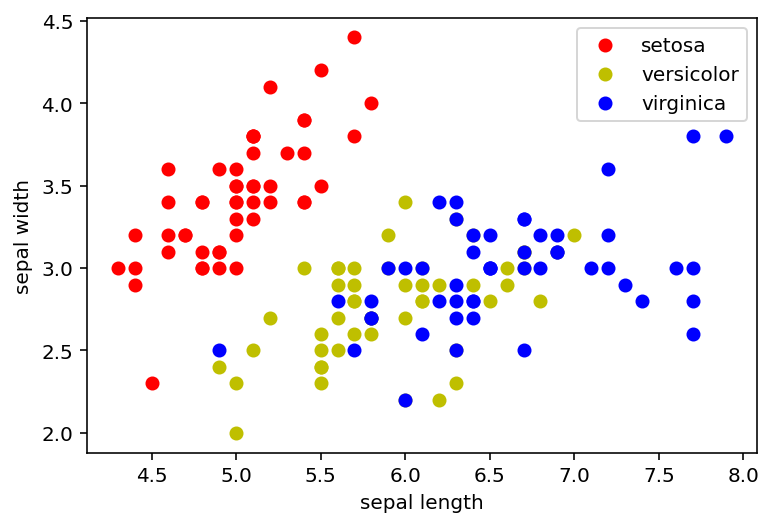

In [ ]:
#setosa는 빨간색, versicolor는 노란색, virginica는 파란색
color=['r', 'y', 'b']

# setosa의 target 값은 0, versicolor는 1, virginica는 2. 
# 각 target 별로 다른 색으로 scatter plot 
for i, c in enumerate(color):
  x_axis = df[df['target']==i]['sepal_length']
  y_axis = df[df['target']==i]['sepal_width']
  plt.scatter(x_axis, y_axis, color=c, label=iris.target_names[i])

plt.legend()
plt.xlabel('sepal length')
plt.ylabel('sepal width')
plt.show()

In [ ]:
# Target 값을 제외한 모든 속성 값을 MinMaxScaler를 이용하여 변환
# 'sepal_length','sepal_width','petal_length','petal_width'
df_features = df[['sepal_length', 'sepal_width', 'petal_length', 'petal_width']]
df_scaler = MinMaxScaler().fit_transform(df_features)

In [ ]:
# PCA를 이용하여 4차원 변수를 2차원으로 변환

pca = PCA(n_components=2)

#fit( )과 transform( ) 을 호출하여 PCA 변환 / 데이터 반환
pca.fit(df_scaler)
df_pca = pca.transform(df_scaler)
print(df_pca.shape)

(150, 2)


In [ ]:
# PCA 변환된 데이터의 컬럼명을 각각 PCA_1, PCA_2로 지정

df_pca = pd.DataFrame(df_pca)
df_pca.columns = ['PCA_1', 'PCA_2']
df_pca['target'] = df.target
df_pca.head()

,PCA_1,PCA_2,target
0,-0.630703,0.107578,0
1,-0.622905,-0.104260,0
2,-0.669520,-0.051417,0
3,-0.654153,-0.102885,0
4,-0.648788,0.133488,0


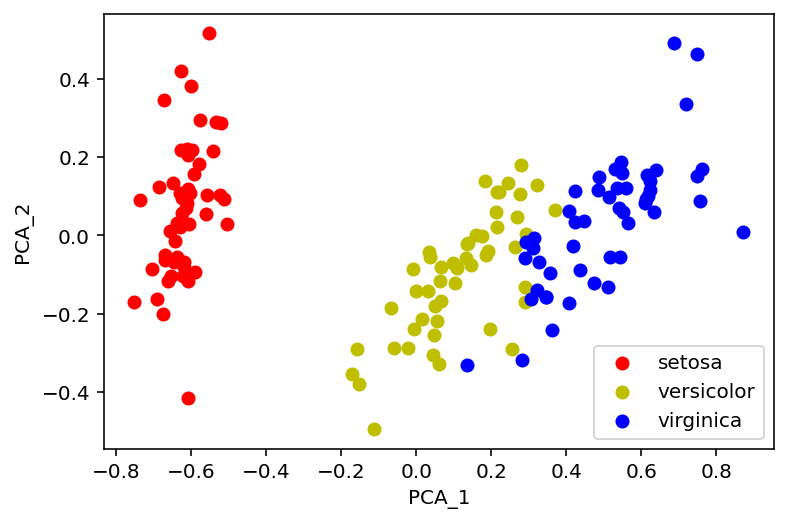

In [ ]:
#setosa는 빨간색, versicolor는 노란색, virginica는 파란색
color=['r', 'y', 'b']

# setosa의 target 값은 0, versicolor는 1, virginica는 2. 
# 각 target 별로 다른 색으로 scatter plot 
for i, c in enumerate(color):
    x_axis = df_pca[df_pca['target']==i]['PCA_1']
    y_axis = df_pca[df_pca['target']==i]['PCA_2']
    plt.scatter(x_axis, y_axis, color = c,label=iris.target_names[i])

plt.legend()
plt.xlabel('PCA_1')
plt.ylabel('PCA_2')
plt.show()